## IMPORTING LIBRARIES 

In [2]:
! pip install lightgbm


In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Boosting libraries
import xgboost as xgb
import lightgbm as lgbm

 


## Load the Titanic dataset 

In [5]:
train = pd.read_csv('/Users/shreyasingh/Downloads/XGBM & LGBM/Titanic_train.csv')
test = pd.read_csv('/Users/shreyasingh/Downloads/XGBM & LGBM/Titanic_test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# handling missing value


In [11]:
train= train.drop(columns= 'Cabin', axis = 1)

In [12]:
train['Age'].fillna(train['Age'].mean(),inplace=True)


In [13]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# data analysis

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# data visualization

In [19]:
sns.set()

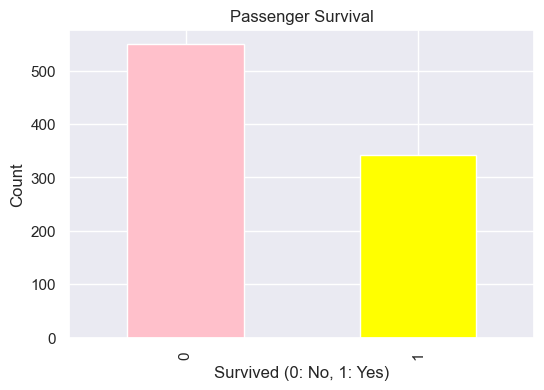

In [20]:
#making a count plot of people survived or not
plt.figure(figsize=(6, 4))
train['Survived'].value_counts().plot(kind='bar', color=['pink', 'yellow'])
plt.title('Passenger Survival')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count') 
plt.show()

Text(0, 0.5, 'Count')

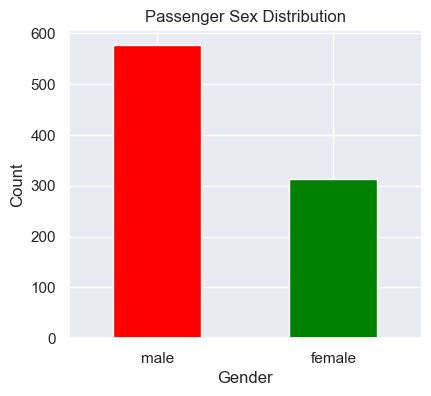

In [21]:
# gender visualization

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
train['Sex'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Passenger Sex Distribution')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')


<Axes: xlabel='Sex', ylabel='count'>

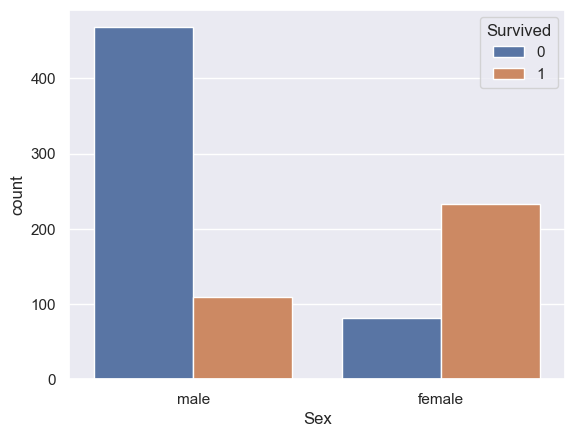

In [22]:
# no of survivers on based on gender based
sns.countplot(x='Sex', hue='Survived', data=train)  

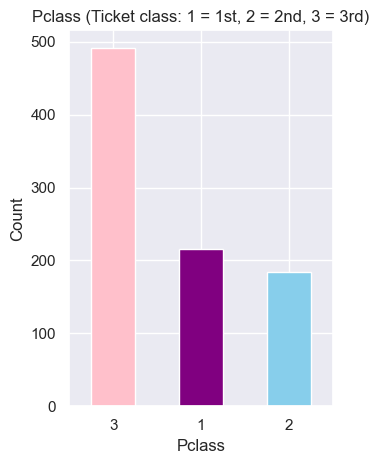

In [23]:
#Pclass visuals

plt.subplot(1, 2, 2)
train['Pclass'].value_counts().plot(kind='bar', color=['pink', 'purple', 'skyblue'])
plt.title('Pclass (Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

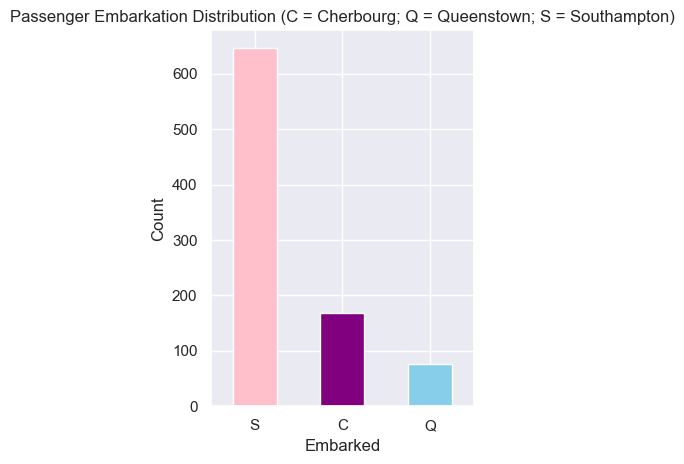

In [24]:
# embarked visuals
plt.subplot(1, 2, 2)
train['Embarked'].value_counts().plot(kind='bar', color=['pink', 'purple', 'skyblue'])
plt.title('Passenger Embarkation Distribution (C = Cherbourg; Q = Queenstown; S = Southampton)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

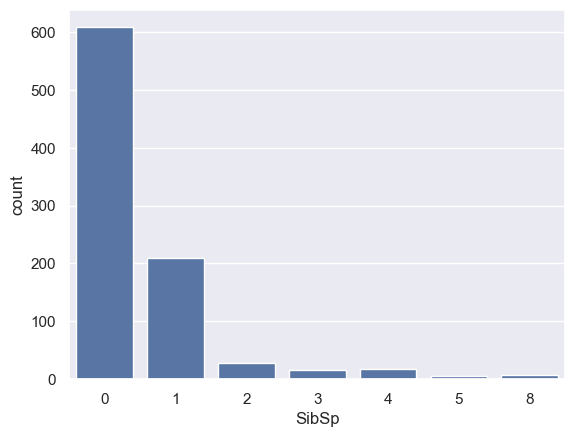

In [25]:
#Number of siblings / spouses aboard the Titanic

sns.countplot(x = 'SibSp', data = train)


<Axes: xlabel='Pclass', ylabel='Age'>

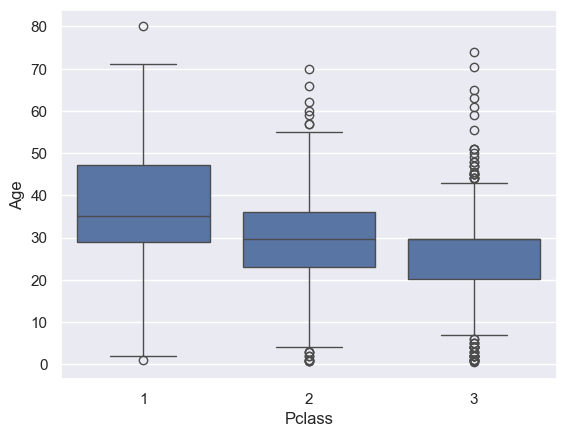

In [26]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)


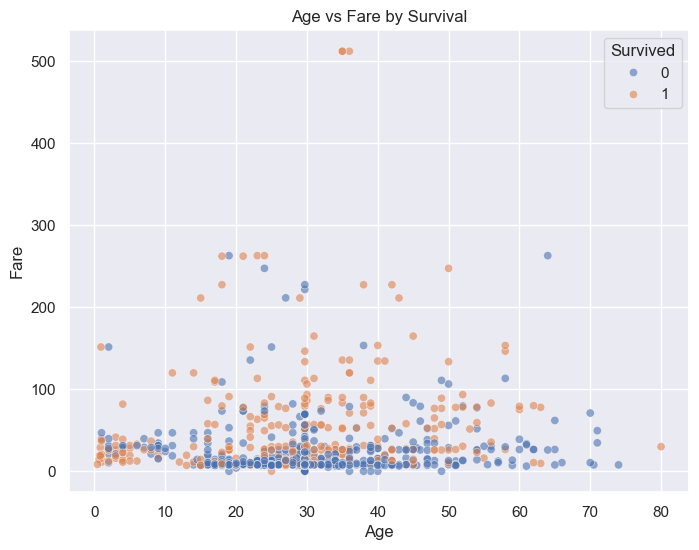

In [27]:
# Scatter plot for Age vs Fare colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.title('Age vs Fare by Survival')
plt.show()

# Data Preprocessing


In [29]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pcl = pd.get_dummies(train['Pclass'],drop_first=True)

In [30]:
train = pd.concat([train,sex,embark,pcl],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
train.drop(['Pclass','Sex','Embarked','PassengerId','Name','Ticket'],axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [32]:
train.isnull().sum()


Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

# test data

In [34]:
sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pcl = pd.get_dummies(test['Pclass'],drop_first=True)


In [35]:
# Concat new features in test data
test = pd.concat([test,sex,embark,pcl],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1


In [36]:
# Dropping columns from train dataset
test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)

In [37]:
#Check for NULL values
test.isnull().sum()

Age      86
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
2         0
3         0
dtype: int64

In [38]:
# Handling NULL values
test_values = {'Age':round(np.mean(test['Age'])), 'Fare':round(np.mean(test['Fare']))}
test = test.fillna(value = test_values)
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


# Scaling and Feature Engineering

In [40]:
X = train.drop('Survived',axis=1)
Y = train['Survived']
print(X)

           Age  SibSp  Parch     Fare  male  Q  S  2  3
0    22.000000      1      0   7.2500     1  0  1  0  1
1    38.000000      1      0  71.2833     0  0  0  0  0
2    26.000000      0      0   7.9250     0  0  1  0  1
3    35.000000      1      0  53.1000     0  0  1  0  0
4    35.000000      0      0   8.0500     1  0  1  0  1
..         ...    ...    ...      ...   ... .. .. .. ..
886  27.000000      0      0  13.0000     1  0  1  1  0
887  19.000000      0      0  30.0000     0  0  1  0  0
888  29.699118      1      2  23.4500     0  0  1  0  1
889  26.000000      0      0  30.0000     1  0  0  0  0
890  32.000000      0      0   7.7500     1  1  0  0  1

[891 rows x 9 columns]


In [41]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# splitting the data into training data and test data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (623, 9) (268, 9)


# Define Model


In [46]:
logmodel = LogisticRegression(solver = 'liblinear')


# Fit Model


In [48]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [49]:
logmodel.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [50]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(solver='liblinear')

In [51]:
predictions = logmodel.predict(X_test)


# Model Evaluation


In [53]:
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [54]:
# Confusion Matrix
print(confusion_matrix(Y_test, predictions))


[[134  19]
 [ 40  75]]


In [55]:
# Accuracy
print(accuracy_score(Y_test, predictions))

0.7798507462686567


In [56]:
test.columns = test.columns.astype(str)

In [57]:
#Prediction
test_predictions = logmodel.predict(test)


# Build Models Using LightGBM and XGBoost

In [59]:
# Initialize and train LightGBM model
lgb_model = lgbm.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, Y_train)


[LightGBM] [Info] Number of positive: 227, number of negative: 396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364366 -> initscore=-0.556464
[LightGBM] [Info] Start training from score -0.556464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

In [60]:
# Make predictions
lgb_predictions = lgb_model.predict(X_test)

In [61]:
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    

In [62]:
# Evaluate LightGBM model
print("LightGBM Model Performance:")
evaluate_model(Y_test, lgb_predictions)

LightGBM Model Performance:


# XGBoost Model

In [64]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [65]:
# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost model
print("XGBoost Model Performance:")
evaluate_model(Y_test, xgb_predictions)

XGBoost Model Performance:


In [66]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [67]:
cross_valid_scores = {}

In [68]:
categorical_columns = ['Sex', 'Embarked', 'Title', 'TicketNumber', 'IsAlone']


In [69]:
#decision tree

parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 3}
Mean cross-validated accuracy score of the best_estimator: 0.830
-----


In [70]:
# random forest
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)
model_random_forest.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 5, 'n_estimators': 20}
Mean cross-validated accuracy score of the best_estimator: 0.830
-----


In [71]:
#XGBoost

parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier(
    random_state=SEED,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
print('-----')

-----
Best parameters {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.844
-----


In [72]:
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')


In [84]:
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [86]:
parameters = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
}

model_lgbm = lgbm.LGBMClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_lgbm = GridSearchCV(
    model_lgbm, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_lgbm.fit(
    X_train, 
    Y_train,  
    categorical_feature=categorical_columns
)

print('-----')
print(f'Best parameters {model_lgbm.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_lgbm.best_score_:.3f}'
)
cross_valid_scores['lightgbm'] = model_lgbm.best_score_
print('-----')

[LightGBM] [Info] Number of positive: 182, number of negative: 316
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 181, number of negative: 317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 9
[LightGBM] [Info] [binary:BoostFromS

In [98]:
# Predictions on the test set
lgb_test_predictions = lgb_model.predict(X_test)
xgb_test_predictions = xgb_model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate LightGBM
lgb_accuracy = accuracy_score(Y_test, lgb_test_predictions)
lgb_precision = precision_score(Y_test, lgb_test_predictions)
lgb_recall = recall_score(Y_test, lgb_test_predictions)
lgb_f1 = f1_score(Y_test, lgb_test_predictions)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(Y_test, xgb_test_predictions)
xgb_precision = precision_score(Y_test, xgb_test_predictions)
xgb_recall = recall_score(Y_test, xgb_test_predictions)
xgb_f1 = f1_score(Y_test, xgb_test_predictions)

# Print performance metrics
print("LightGBM Performance:")
print(f"Accuracy: {lgb_accuracy:.4f}, Precision: {lgb_precision:.4f}, Recall: {lgb_recall:.4f}, F1-score: {lgb_f1:.4f}")

print("\nXGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1-score: {xgb_f1:.4f}")


LightGBM Performance:
Accuracy: 0.7575, Precision: 0.8049, Recall: 0.5739, F1-score: 0.6701

XGBoost Performance:
Accuracy: 0.7500, Precision: 0.7857, Recall: 0.5739, F1-score: 0.6633


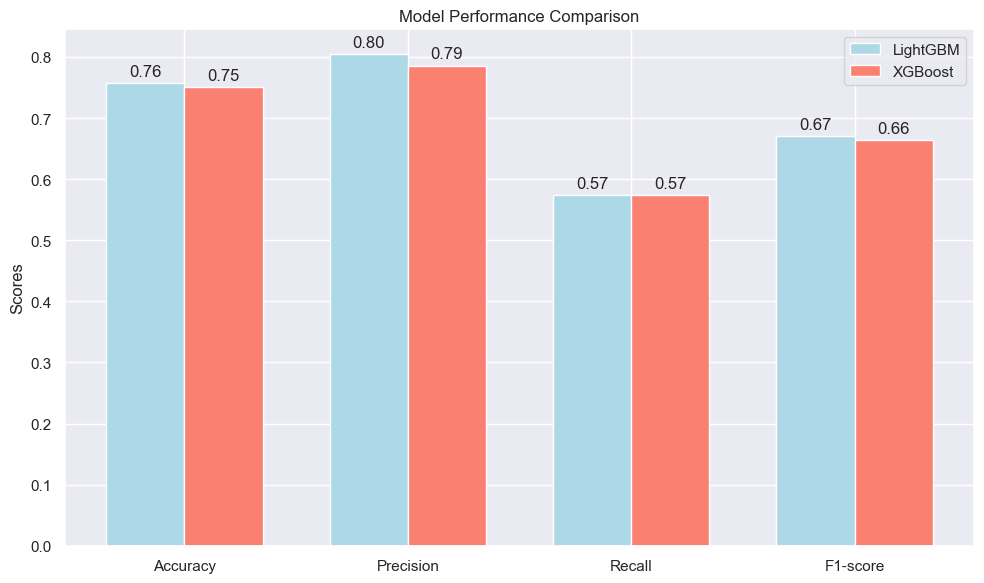

In [102]:


# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgb_scores = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

# Plotting
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='lightblue')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='salmon')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [104]:
pd.DataFrame(cross_valid_scores, index=['cross_valid_score']).T


,cross_valid_score
desicion_tree,0.829871
random_forest,0.829819
xgboost,0.844271
lightgbm,0.831458


# summary

In [ ]:
Performance Metrics Comparison:

Accuracy: Both models showed similar accuracy, indicating that they perform similarly in terms of overall classification correctness.
Precision: LightGBM showed a higher precision, meaning it was more accurate in identifying positive cases without classifying too many negatives as positives.
Recall: XGBoost performed slightly better in recall, indicating it was slightly better at identifying all the actual positive cases.
F1-score: XGBoost had a higher F1-score, reflecting a better balance between precision and recall.